In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\admin\Desktop\cluster.xlsx')
df

,Infection,broadness
0,17106.003950,279
1,1464.835865,40
2,39907.486612,198
3,5787.954048,103
4,27718.139340,177
...,...,...
56,2981.986095,47
57,54955.993975,171
58,25183.523069,287
59,3690.764000,114


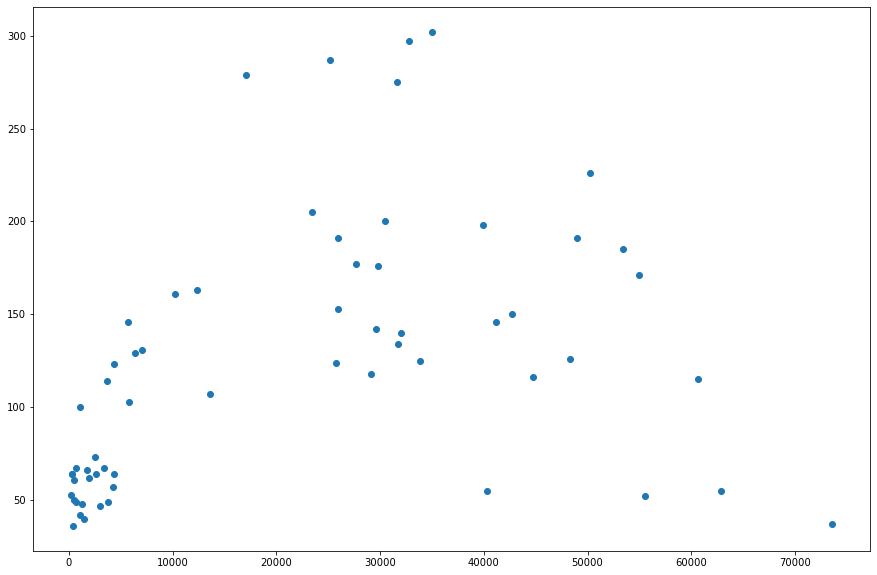

In [3]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Infection'], df['broadness'])

In [4]:
scaler = MinMaxScaler()
df['Infection'] = scaler.fit_transform(df[['Infection']])
df['broadness'] = scaler.fit_transform(df[['broadness']])

In [5]:
km = KMeans(n_clusters=4)
df['cluster'] = km.fit_predict(df[['Infection', 'broadness']])
df['cluster']

0     2
1     0
2     1
3     0
4     1
     ..
56    0
57    1
58    2
59    0
60    1
Name: cluster, Length: 61, dtype: int32

In [6]:
km.cluster_centers_

array([[0.04044803, 0.15465388],
       [0.48146799, 0.47248804],
       [0.38301579, 0.94736842],
       [0.79573982, 0.10075188]])

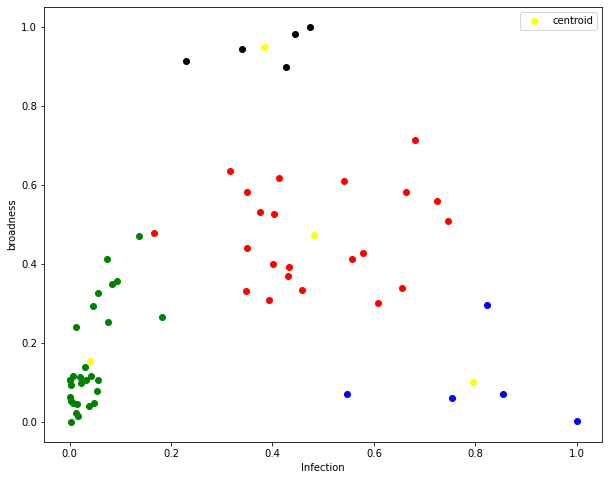

In [7]:
plt.figure(figsize=(10, 8))
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
plt.scatter(df1.Infection, df1.broadness, color = 'green')
plt.scatter(df2.Infection, df2.broadness, color = 'red')
plt.scatter(df3.Infection, df3.broadness, color = 'black')
plt.scatter(df4.Infection, df4.broadness, color = 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', label = 'centroid')
plt.xlabel('Infection')
plt.ylabel('broadness')
plt.legend()

In [8]:
df1 = pd.read_excel(r'C:\Users\admin\Desktop\country.xlsx')
df1

,Lebel
0,1
1,2
2,3
3,4
4,5
...,...
56,57
57,58
58,59
59,60


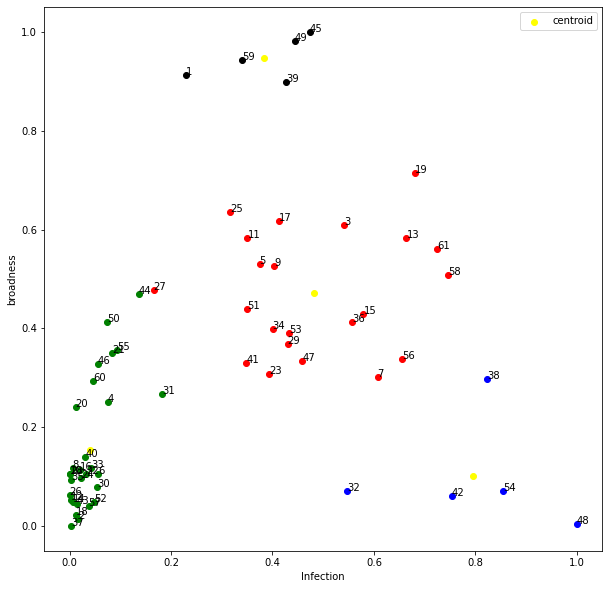

In [10]:
plt.figure(figsize=(10, 10))
for i, txt in enumerate(df1['Lebel']):
    plt.annotate(txt, (df['Infection'][i], df['broadness'][i]))
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
plt.scatter(df1.Infection, df1.broadness, color = 'green')
plt.scatter(df2.Infection, df2.broadness, color = 'red')
plt.scatter(df3.Infection, df3.broadness, color = 'black')
plt.scatter(df4.Infection, df4.broadness, color = 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', label = 'centroid')
plt.xlabel('Infection')
plt.ylabel('broadness')
plt.legend()

In [11]:
k_value = range(1,11)
sse = []
for k in k_value:
    km = KMeans(n_clusters=k)
    km.fit(df[['Infection', 'broadness']])
    sse.append(km.inertia_)
    
    
sse

[8.974088621277446,
 3.8384052564380906,
 2.3073094987938534,
 1.5326566329660067,
 1.0271295916807321,
 0.696816946089422,
 0.5356805512881935,
 0.4348662860430341,
 0.35778196190725603,
 0.3065710399984921]

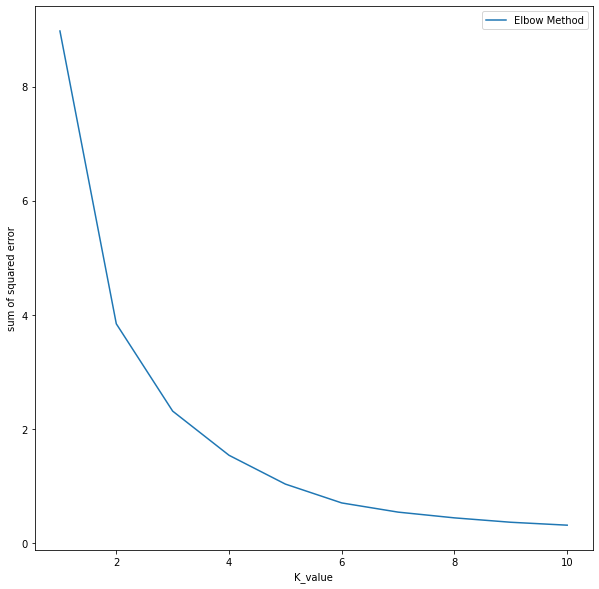

In [13]:
plt.figure(figsize=(10, 10))
plt.xlabel('K_value')
plt.ylabel('sum of squared error')
plt.plot(k_value, sse, label = 'Elbow Method')
plt.legend()